# COVID-19 exploratory data analysis

ver. A.L. 20200512 

**Slightly modified from Greg Rafferty's** https://github.com/raffg/covid-19; <br>see also his
dashboard to monitor the COVID-19 pandemic https://covid-19-raffg.herokuapp.com and his [portfolio](https://github.com/raffg/portfolio/blob/master/README.md)

### Uses data provided by the [Johns Hopkins Center for Systems Science and Engineering](https://github.com/CSSEGISandData/COVID-19)

Requires: 
 - plotly: https://plotly.com/python  (`conda install plotly`)

 - cufflinks: https://plotly.com/python/v3/ipython-notebooks/cufflinks (`pip install cufflinks --upgrade`)

## Learning objectives

- How to read (updated) data from the web
- How to organize and analyse data using `pandas`
- How to make interactive graphs using `plotly`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
from datetime import date, timedelta
import io
import requests
import plotly
print('plotly:', plotly.__version__)
# Standard plotly imports
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
print('cufflinks:', cufflinks.__version__)
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)


plotly: 4.6.0
cufflinks: 0.17.3


In [2]:
# # Load files from folder
# path = 'COVID-19/csse_covid_19_data/csse_covid_19_daily_reports'
# all_files = glob.glob(path + "/*.csv")

# files = []

# for filename in all_files:
#     file = re.search(r'([0-9]{2}\-[0-9]{2}\-[0-9]{4})', filename)[0]
#     df = pd.read_csv(filename, index_col=None, header=0)
#     df['date'] = pd.to_datetime(file)
#     files.append(df)

# df = pd.concat(files, axis=0, ignore_index=True, sort=False)

```
# Load files from web
file_date = date(2020, 1, 22)
dates = []

while file_date <= date.today():
    dates.append(file_date)
    file_date += timedelta(days=1)
    
files = []
for file in dates:
    file = file.strftime("%m-%d-%Y")
    print(file)
    url = r'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{}.csv'.format(file)
    raw_string = requests.get(url).content
    dff = pd.read_csv(io.StringIO(raw_string.decode('utf-8')))
    dff['date'] = pd.to_datetime(file)
    dff.rename(columns={'Country_Region': 'Country/Region'}, inplace=True)
    files.append(dff)

dff = pd.concat(files, axis=0, ignore_index=True, sort=False)
```

```
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165400 entries, 0 to 165399
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  4358 non-null    object        
 1   Country/Region  165400 non-null  object        
 2   Last Update     7617 non-null    object        
 3   Confirmed       165381 non-null  float64       
 4   Deaths          164959 non-null  float64       
 5   Recovered       165012 non-null  float64       
 6   date            165400 non-null  datetime64[ns]
 7   Latitude        4799 non-null    float64       
 8   Longitude       4799 non-null    float64       
 9   FIPS            143674 non-null  float64       
 10  Admin2          144198 non-null  object        
 11  Province_State  148664 non-null  object        
 12  Last_Update     157783 non-null  object        
 13  Lat             155291 non-null  float64       
 14  Long_           155291 non-null  float64       
 15  Active          157783 non-null  float64       
 16  Combined_Key    157783 non-null  object        
 17  404: Not Found  0 non-null       object        
dtypes: datetime64[ns](1), float64(9), object(8)
memory usage: 22.7+ MB
```

In [3]:
# Save to disk (overwrite previous version)
#dff.to_csv('./data/csse_covid_19_daily_reports.csv', encoding='utf-8', index=False)

In [4]:
tmp = pd.read_csv('./data/csse_covid_19_daily_reports.csv')
df = tmp

/Users/arvid/anaconda3/envs/bmed360v2020/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.



In [5]:
# Rename countries with duplicate naming conventions
df['Country/Region'].replace('Mainland China', 'China', inplace=True)
df['Country/Region'].replace('Hong Kong SAR', 'Hong Kong', inplace=True)
df['Country/Region'].replace(' Azerbaijan', 'Azerbaijan', inplace=True)
df['Country/Region'].replace('Holy See', 'Vatican City', inplace=True)
df['Country/Region'].replace('Iran (Islamic Republic of)', 'Iran', inplace=True)
df['Country/Region'].replace('Taiwan*', 'Taiwan', inplace=True)
df['Country/Region'].replace('Korea, South', 'South Korea', inplace=True)
df['Country/Region'].replace('Viet Nam', 'Vietnam', inplace=True)
df['Country/Region'].replace('Macao SAR', 'Macau', inplace=True)
df['Country/Region'].replace('Russian Federation', 'Russia', inplace=True)
df['Country/Region'].replace('Republic of Moldova', 'Moldova', inplace=True)
df['Country/Region'].replace('Czechia', 'Czech Republic', inplace=True)
df['Country/Region'].replace('Congo (Kinshasa)', 'Congo', inplace=True)
df['Country/Region'].replace('Northern Ireland', 'United Kingdom', inplace=True)
df['Country/Region'].replace('Republic of Korea', 'North Korea', inplace=True)
df['Country/Region'].replace('Congo (Brazzaville)', 'Congo', inplace=True)
df['Country/Region'].replace('Taipei and environs', 'Taiwan', inplace=True)
df['Country/Region'].replace('Others', 'Cruise Ship', inplace=True)
df['Province/State'].replace('Cruise Ship', 'Diamond Princess cruise ship', inplace=True)
df['Province/State'].replace('From Diamond Princess', 'Diamond Princess cruise ship', inplace=True)

# Replace old reporting standards
df['Province/State'].replace('Chicago', 'Illinois', inplace=True)
df['Province/State'].replace('Chicago, IL', 'Illinois', inplace=True)
df['Province/State'].replace('Cook County, IL', 'Illinois', inplace=True)
df['Province/State'].replace('Boston, MA', 'Massachusetts', inplace=True)
df['Province/State'].replace(' Norfolk County, MA', 'Massachusetts', inplace=True)
df['Province/State'].replace('Suffolk County, MA', 'Massachusetts', inplace=True)
df['Province/State'].replace('Middlesex County, MA', 'Massachusetts', inplace=True)
df['Province/State'].replace('Norwell County, MA', 'Massachusetts', inplace=True)
df['Province/State'].replace('Plymouth County, MA', 'Massachusetts', inplace=True)
df['Province/State'].replace('Norfolk County, MA', 'Massachusetts', inplace=True)
df['Province/State'].replace('Berkshire County, MA', 'Massachusetts', inplace=True)
df['Province/State'].replace('Unknown Location, MA', 'Massachusetts', inplace=True)
df['Province/State'].replace('Los Angeles, CA', 'California', inplace=True)
df['Province/State'].replace('Orange, CA', 'California', inplace=True)
df['Province/State'].replace('Santa Clara, CA', 'California', inplace=True)
df['Province/State'].replace('San Benito, CA', 'California', inplace=True)
df['Province/State'].replace('Humboldt County, CA', 'California', inplace=True)
df['Province/State'].replace('Sacramento County, CA', 'California', inplace=True)
df['Province/State'].replace('Travis, CA (From Diamond Princess)', 'California', inplace=True)
df['Province/State'].replace('Placer County, CA', 'California', inplace=True)
df['Province/State'].replace('San Mateo, CA', 'California', inplace=True)
df['Province/State'].replace('Sonoma County, CA', 'California', inplace=True)
df['Province/State'].replace('Berkeley, CA', 'California', inplace=True)
df['Province/State'].replace('Orange County, CA', 'California', inplace=True)
df['Province/State'].replace('Contra Costa County, CA', 'California', inplace=True)
df['Province/State'].replace('San Francisco County, CA', 'California', inplace=True)
df['Province/State'].replace('Yolo County, CA', 'California', inplace=True)
df['Province/State'].replace('Santa Clara County, CA', 'California', inplace=True)
df['Province/State'].replace('San Diego County, CA', 'California', inplace=True)
df['Province/State'].replace('Travis, CA', 'California', inplace=True)
df['Province/State'].replace('Alameda County, CA', 'California', inplace=True)
df['Province/State'].replace('Madera County, CA', 'California', inplace=True)
df['Province/State'].replace('Santa Cruz County, CA', 'California', inplace=True)
df['Province/State'].replace('Fresno County, CA', 'California', inplace=True)
df['Province/State'].replace('Riverside County, CA', 'California', inplace=True)
df['Province/State'].replace('Shasta County, CA', 'California', inplace=True)
df['Province/State'].replace('Seattle, WA', 'Washington', inplace=True)
df['Province/State'].replace('Snohomish County, WA', 'Washington', inplace=True)
df['Province/State'].replace('King County, WA', 'Washington', inplace=True)
df['Province/State'].replace('Unassigned Location, WA', 'Washington', inplace=True)
df['Province/State'].replace('Clark County, WA', 'Washington', inplace=True)
df['Province/State'].replace('Jefferson County, WA', 'Washington', inplace=True)
df['Province/State'].replace('Pierce County, WA', 'Washington', inplace=True)
df['Province/State'].replace('Kittitas County, WA', 'Washington', inplace=True)
df['Province/State'].replace('Grant County, WA', 'Washington', inplace=True)
df['Province/State'].replace('Spokane County, WA', 'Washington', inplace=True)
df['Province/State'].replace('Tempe, AZ', 'Arizona', inplace=True)
df['Province/State'].replace('Maricopa County, AZ', 'Arizona', inplace=True)
df['Province/State'].replace('Pinal County, AZ', 'Arizona', inplace=True)
df['Province/State'].replace('Madison, WI', 'Wisconsin', inplace=True)
df['Province/State'].replace('San Antonio, TX', 'Texas', inplace=True)
df['Province/State'].replace('Lackland, TX', 'Texas', inplace=True)
df['Province/State'].replace('Lackland, TX (From Diamond Princess)', 'Texas', inplace=True)
df['Province/State'].replace('Harris County, TX', 'Texas', inplace=True)
df['Province/State'].replace('Fort Bend County, TX', 'Texas', inplace=True)
df['Province/State'].replace('Montgomery County, TX', 'Texas', inplace=True)
df['Province/State'].replace('Collin County, TX', 'Texas', inplace=True)
df['Province/State'].replace('Ashland, NE', 'Nebraska', inplace=True)
df['Province/State'].replace('Omaha, NE (From Diamond Princess)', 'Nebraska', inplace=True)
df['Province/State'].replace('Douglas County, NE', 'Nebraska', inplace=True)
df['Province/State'].replace('Portland, OR', 'Oregon', inplace=True)
df['Province/State'].replace('Umatilla, OR', 'Oregon', inplace=True)
df['Province/State'].replace('Klamath County, OR', 'Oregon', inplace=True)
df['Province/State'].replace('Douglas County, OR', 'Oregon', inplace=True)
df['Province/State'].replace('Marion County, OR', 'Oregon', inplace=True)
df['Province/State'].replace('Jackson County, OR ', 'Oregon', inplace=True)
df['Province/State'].replace('Washington County, OR', 'Oregon', inplace=True)
df['Province/State'].replace('Providence, RI', 'Rhode Island', inplace=True)
df['Province/State'].replace('Providence County, RI', 'Rhode Island', inplace=True)
df['Province/State'].replace('Grafton County, NH', 'New Hampshire', inplace=True)
df['Province/State'].replace('Rockingham County, NH', 'New Hampshire', inplace=True)
df['Province/State'].replace('Hillsborough, FL', 'Florida', inplace=True)
df['Province/State'].replace('Sarasota, FL', 'Florida', inplace=True)
df['Province/State'].replace('Santa Rosa County, FL', 'Florida', inplace=True)
df['Province/State'].replace('Broward County, FL', 'Florida', inplace=True)
df['Province/State'].replace('Lee County, FL', 'Florida', inplace=True)
df['Province/State'].replace('Volusia County, FL', 'Florida', inplace=True)
df['Province/State'].replace('Manatee County, FL', 'Florida', inplace=True)
df['Province/State'].replace('Okaloosa County, FL', 'Florida', inplace=True)
df['Province/State'].replace('Charlotte County, FL', 'Florida', inplace=True)
df['Province/State'].replace('New York City, NY', 'New York', inplace=True)
df['Province/State'].replace('Westchester County, NY', 'New York', inplace=True)
df['Province/State'].replace('Queens County, NY', 'New York', inplace=True)
df['Province/State'].replace('New York County, NY', 'New York', inplace=True)
df['Province/State'].replace('Nassau, NY', 'New York', inplace=True)
df['Province/State'].replace('Nassau County, NY', 'New York', inplace=True)
df['Province/State'].replace('Rockland County, NY', 'New York', inplace=True)
df['Province/State'].replace('Saratoga County, NY', 'New York', inplace=True)
df['Province/State'].replace('Suffolk County, NY', 'New York', inplace=True)
df['Province/State'].replace('Ulster County, NY', 'New York', inplace=True)
df['Province/State'].replace('Fulton County, GA', 'Georgia', inplace=True)
df['Province/State'].replace('Floyd County, GA', 'Georgia', inplace=True)
df['Province/State'].replace('Polk County, GA', 'Georgia', inplace=True)
df['Province/State'].replace('Cherokee County, GA', 'Georgia', inplace=True)
df['Province/State'].replace('Cobb County, GA', 'Georgia', inplace=True)
df['Province/State'].replace('Wake County, NC', 'North Carolina', inplace=True)
df['Province/State'].replace('Chatham County, NC', 'North Carolina', inplace=True)
df['Province/State'].replace('Bergen County, NJ', 'New Jersey', inplace=True)
df['Province/State'].replace('Hudson County, NJ', 'New Jersey', inplace=True)
df['Province/State'].replace('Clark County, NV', 'Nevada', inplace=True)
df['Province/State'].replace('Washoe County, NV', 'Nevada', inplace=True)
df['Province/State'].replace('Williamson County, TN', 'Tennessee', inplace=True)
df['Province/State'].replace('Davidson County, TN', 'Tennessee', inplace=True)
df['Province/State'].replace('Shelby County, TN', 'Tennessee', inplace=True)
df['Province/State'].replace('Montgomery County, MD', 'Maryland', inplace=True)
df['Province/State'].replace('Harford County, MD', 'Maryland', inplace=True)
df['Province/State'].replace('Denver County, CO', 'Colorado', inplace=True)
df['Province/State'].replace('Summit County, CO', 'Colorado', inplace=True)
df['Province/State'].replace('Douglas County, CO', 'Colorado', inplace=True)
df['Province/State'].replace('El Paso County, CO', 'Colorado', inplace=True)
df['Province/State'].replace('Delaware County, PA', 'Pennsylvania', inplace=True)
df['Province/State'].replace('Wayne County, PA', 'Pennsylvania', inplace=True)
df['Province/State'].replace('Montgomery County, PA', 'Pennsylvania', inplace=True)
df['Province/State'].replace('Fayette County, KY', 'Kentucky', inplace=True)
df['Province/State'].replace('Jefferson County, KY', 'Kentucky', inplace=True)
df['Province/State'].replace('Harrison County, KY', 'Kentucky', inplace=True)
df['Province/State'].replace('Marion County, IN', 'Indiana', inplace=True)
df['Province/State'].replace('Hendricks County, IN', 'Indiana', inplace=True)
df['Province/State'].replace('Ramsey County, MN', 'Minnesota', inplace=True)
df['Province/State'].replace('Carver County, MN', 'Minnesota', inplace=True)
df['Province/State'].replace('Fairfield County, CT', 'Connecticut', inplace=True)
df['Province/State'].replace('Charleston County, SC', 'South Carolina', inplace=True)
df['Province/State'].replace('Spartanburg County, SC', 'South Carolina', inplace=True)
df['Province/State'].replace('Kershaw County, SC', 'South Carolina', inplace=True)
df['Province/State'].replace('Davis County, UT', 'Utah', inplace=True)
df['Province/State'].replace('Honolulu County, HI', 'Hawaii', inplace=True)
df['Province/State'].replace('Tulsa County, OK', 'Oklahoma', inplace=True)
df['Province/State'].replace('Fairfax County, VA', 'Virginia', inplace=True)
df['Province/State'].replace('St. Louis County, MO', 'Missouri', inplace=True)
df['Province/State'].replace('Unassigned Location, VT', 'Vermont', inplace=True)
df['Province/State'].replace('Bennington County, VT', 'Vermont', inplace=True)
df['Province/State'].replace('Johnson County, IA', 'Iowa', inplace=True)
df['Province/State'].replace('Jefferson Parish, LA', 'Louisiana', inplace=True)
df['Province/State'].replace('Johnson County, KS', 'Kansas', inplace=True)
df['Province/State'].replace('Washington, D.C.', 'District of Columbia', inplace=True)


In [6]:
# Interpolate values for missing South Korea data on March 11 
# (we skip this, but see the original https://github.com/raffg/covid-19/blob/master/eda.ipynb)

In [7]:
# South Korea data on March 10 seems to be mislabled as North Korea
df.loc[(df['Country/Region'] == 'North Korea') & (df['date'] == '03-10-2020'), 'Country/Region'] = 'South Korea'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165400 entries, 0 to 165399
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Province/State  4358 non-null    object 
 1   Country/Region  165400 non-null  object 
 2   Last Update     7617 non-null    object 
 3   Confirmed       165381 non-null  float64
 4   Deaths          164959 non-null  float64
 5   Recovered       165012 non-null  float64
 6   date            165400 non-null  object 
 7   Latitude        4799 non-null    float64
 8   Longitude       4799 non-null    float64
 9   FIPS            143674 non-null  float64
 10  Admin2          144198 non-null  object 
 11  Province_State  148664 non-null  object 
 12  Last_Update     157783 non-null  object 
 13  Lat             155291 non-null  float64
 14  Long_           155291 non-null  float64
 15  Active          157783 non-null  float64
 16  Combined_Key    157783 non-null  object 
 17  404: Not F

In [9]:
df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,date,Latitude,Longitude,FIPS,Admin2,Province_State,Last_Update,Lat,Long_,Active,Combined_Key,404: Not Found
0,Anhui,China,1/22/2020 17:00,1.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,China,1/22/2020 17:00,14.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chongqing,China,1/22/2020 17:00,6.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fujian,China,1/22/2020 17:00,1.0,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gansu,China,1/22/2020 17:00,NaN,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165395,NaN,West Bank and Gaza,NaN,375.0,2.0,301.0,2020-05-11,NaN,NaN,NaN,NaN,NaN,2020-05-12 03:32:27,31.952200,35.233200,72.0,West Bank and Gaza,NaN
165396,NaN,Western Sahara,NaN,6.0,0.0,6.0,2020-05-11,NaN,NaN,NaN,NaN,NaN,2020-05-12 03:32:27,24.215500,-12.885800,0.0,Western Sahara,NaN
165397,NaN,Yemen,NaN,56.0,9.0,1.0,2020-05-11,NaN,NaN,NaN,NaN,NaN,2020-05-12 03:32:27,15.552727,48.516388,46.0,Yemen,NaN
165398,NaN,Zambia,NaN,267.0,7.0,117.0,2020-05-11,NaN,NaN,NaN,NaN,NaN,2020-05-12 03:32:27,-13.133897,27.849332,143.0,Zambia,NaN


In [10]:
# Re-order the columns for readability
df = df[['date',
         'Country/Region',
         'Province/State',
         'Confirmed',
         'Deaths',
         'Recovered',
         'Latitude',
         'Longitude']]

# Fill missing values as 0; create Active cases column
df['Confirmed'] = df['Confirmed'].fillna(0).astype(int)
df['Deaths'] = df['Deaths'].fillna(0).astype(int)
df['Recovered'] = df['Recovered'].fillna(0).astype(int)
df['Active'] = df['Confirmed'] - (df['Deaths'] + df['Recovered'])

In [11]:
# Replace missing values for latitude and longitude
df['Latitude'] = df['Latitude'].fillna(df.groupby('Province/State')['Latitude'].transform('mean'))
df['Longitude'] = df['Longitude'].fillna(df.groupby('Province/State')['Longitude'].transform('mean'))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165400 entries, 0 to 165399
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            165400 non-null  object 
 1   Country/Region  165400 non-null  object 
 2   Province/State  4358 non-null    object 
 3   Confirmed       165400 non-null  int64  
 4   Deaths          165400 non-null  int64  
 5   Recovered       165400 non-null  int64  
 6   Latitude        6755 non-null    float64
 7   Longitude       6755 non-null    float64
 8   Active          165400 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 11.4+ MB


In [13]:
n_reg = len(df['Country/Region'].unique())
print('Number of unique Country/Region:', n_reg)

Number of unique Country/Region: 222


In [14]:
df[df['Country/Region'] == 'US'].groupby(['date', 'Province/State'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

Confirmed  Deaths  Recovered  Active
date       Province/State                                      
2020-01-22 Washington              1       0          0       1
2020-01-23 Washington              1       0          0       1
2020-01-24 Illinois                1       0          0       1
           Washington              1       0          0       1
2020-01-25 Illinois                1       0          0       1
...                              ...     ...        ...     ...
2020-03-21 Virginia              156       2          0     154
           Washington           1793      94          0    1699
           West Virginia           8       0          0       8
           Wisconsin             282       4          0     278
           Wyoming                23       0          0      23

[1100 rows x 4 columns]

In [15]:

df[df['Country/Region'] == 'US'].groupby('date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

,Confirmed,Deaths,Recovered,Active
date,,,,
2020-01-22,1,0,0,1
2020-01-23,1,0,0,1
2020-01-24,2,0,0,2
2020-01-25,2,0,0,2
2020-01-26,5,0,0,5
...,...,...,...,...
2020-05-07,1257023,75662,195036,986325
2020-05-08,1283929,77180,198993,1007756
2020-05-09,1309550,78795,212534,1018221


In [16]:
# fatality rate
'{:.2f}%'.format(100 *
                df[df['date'] == df['date'].iloc[-1]]['Deaths'].sum() /
                df[df['date'] == df['date'].iloc[-1]]['Confirmed'].sum())

'6.85%'

In [17]:

fig = go.Figure([go.Scatter(x=df[df['Country/Region'] == 'US'].groupby('date')['date'].first(),
                            y=df[df['Country/Region'] == 'US'].groupby('date')['Active'].sum())])
fig.update_layout(
    title="US: Active COVID-19",
    xaxis_title="Date",
    yaxis_title="Active infected",
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="#7f7f7f"
    )
)
fig.show()

In [18]:
geo_us = df[(df['date'] == '2020-03-22') &
          (df['Country/Region'] == 'US')].groupby('Province/State',
                                                  as_index=False).agg({'Longitude': 'mean',
                                                                        'Latitude': 'mean'})

temp2 = pd.read_csv('./data/csse_covid_19_daily_reports.csv')
df4 = temp2[temp2['Country/Region'] == 'US'].groupby('Province/State', as_index=False).agg({'Confirmed': 'sum'})

df4 = df4.merge(geo_us, left_on='Province/State', right_on='Province/State')

/Users/arvid/anaconda3/envs/bmed360v2020/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.



In [19]:
fig = go.Figure(data=go.Scattergeo(
        lon = df4['Longitude'],
        lat = df4['Latitude'],
        text = df4['Province/State'] + ', ' + ': ' + df4['Confirmed'].astype(str),
        mode = 'markers',
        marker_size = (200 * df4['Confirmed'] / df4['Confirmed'].max()),
        marker = dict(reversescale = False,
                      autocolorscale = False,
                      symbol = 'circle',
                      line = dict(width=1, color='rgba(102, 102, 102)'),
                      colorscale = 'Reds',
                      cmin = 0,
                      color = df4['Confirmed'],
                      cmax = df4['Confirmed'].max(),
                      colorbar_title="Confirmed Cases")))

fig.update_layout(title = 'Number of cumulative confirmed cases in the US by state ',
                  geo=dict(scope='usa',
                           projection_type='albers usa',
                           showland = True,
                           landcolor = "rgb(100, 125, 100)",
                           showocean = True,
                           oceancolor = "rgb(150, 150, 250)",
                           showcountries=True,
                           showsubunits=True,
                           showlakes=True,))
fig.show()

In [20]:
eu = ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia',
'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein',
'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway',
'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City']

In [21]:
df3 = df[df['Country/Region'].isin(eu)]
         
data = df3[df3['date'] == df3['date'].iloc[-1]].groupby('Country/Region').agg({'Active': 'sum',
                                                                               'Longitude': 'mean',
                                                                               'Latitude': 'mean',
                                                                               'Country/Region': 'first',
                                                                               'Province/State': 'first'})

data.loc[data['Country/Region'] == 'France', 'Latitude'] = 46.2276
data.loc[data['Country/Region'] == 'France', 'Longitude'] = -3.4360

data.loc[data['Country/Region'] == 'United Kingdom', 'Latitude'] = 55.3781
data.loc[data['Country/Region'] == 'United Kingdom', 'Longitude'] = 3.4360

data.loc[data['Country/Region'] == 'Denmark', 'Latitude'] = 56.2639
data.loc[data['Country/Region'] == 'Denmark', 'Longitude'] = 9.5018

data.loc[data['Country/Region'] == 'Netherlands', 'Latitude'] = 52.1326
data.loc[data['Country/Region'] == 'Netherlands', 'Longitude'] = 5.2913


fig = go.Figure(data=go.Scattergeo(
        lon = data['Longitude'],
        lat = data['Latitude'],
        text = data['Country/Region'] + ', ' + data['Country/Region'] + ': ' + data['Active'].astype(str),
        mode = 'markers',
        marker_size = (100 * data['Active'] / data['Active'].max()),
        marker = dict(reversescale = False,
                      autocolorscale = False,
                      symbol = 'circle',
                      line = dict(width=1, color='rgba(102, 102, 102)'),
                      colorscale = 'Reds',
                      cmin = 0,
                      color = data['Active'],
                      cmax = data['Active'].max(),
                      colorbar_title="Active Cases")))

fig.update_layout(title = 'Number of active cases by European country ',
                  geo=dict(scope='europe',
                           projection_type="natural earth",
                           showland = True,
                           landcolor = "rgb(100, 125, 100)",
                           showocean = True,
                           oceancolor = "rgb(150, 150, 250)",
                           showcountries=True,
                           showsubunits=True,
                           showlakes=False,))
fig.show()

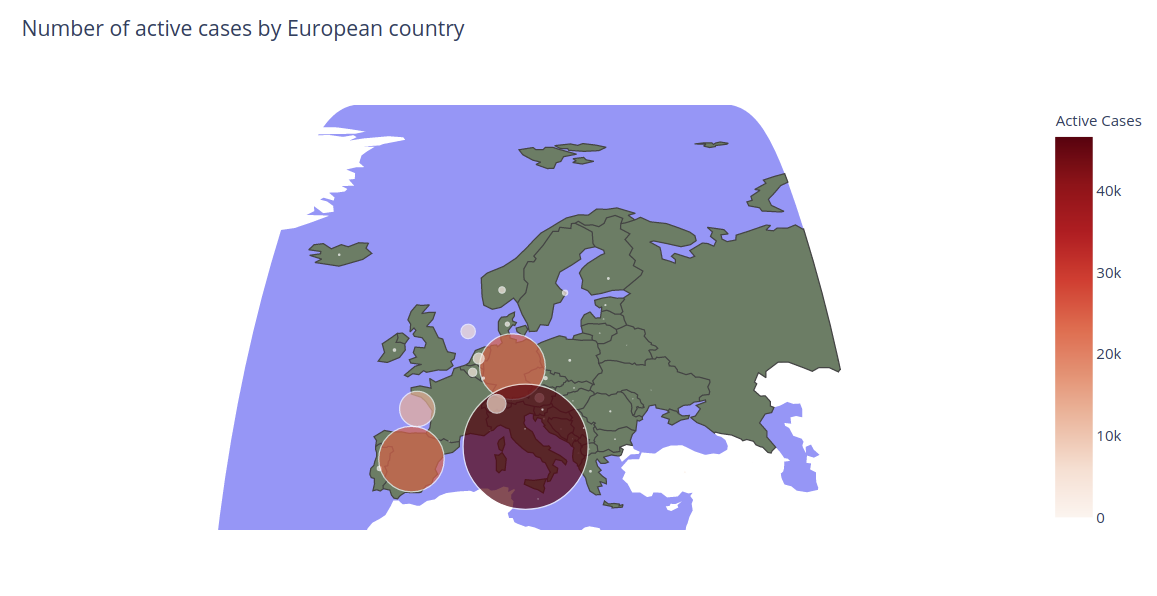

In [22]:
from IPython.display import Image
Image('./assets/active_cases_eu.png', width=600)

## Focus on the epidemiological trajectories in Norway

In [23]:
df0 = df[df['Country/Region'] == 'Norway']
df0.head()

,date,Country/Region,Province/State,Confirmed,Deaths,Recovered,Latitude,Longitude,Active
2464,2020-02-26,Norway,NaN,1,0,0,NaN,NaN,1
2570,2020-02-27,Norway,NaN,1,0,0,NaN,NaN,1
2640,2020-02-28,Norway,NaN,6,0,0,NaN,NaN,6
2749,2020-02-29,Norway,NaN,15,0,0,NaN,NaN,15
2867,2020-03-01,Norway,NaN,19,0,0,60.472,8.4689,19


In [24]:
df0.tail()

,date,Country/Region,Province/State,Confirmed,Deaths,Recovered,Latitude,Longitude,Active
152411,2020-05-07,Norway,NaN,8034,217,32,NaN,NaN,7785
155641,2020-05-08,Norway,NaN,8070,218,32,NaN,NaN,7820
158873,2020-05-09,Norway,NaN,8099,219,32,NaN,NaN,7848
162107,2020-05-10,Norway,NaN,8105,219,32,NaN,NaN,7854
165341,2020-05-11,Norway,NaN,8132,224,32,NaN,NaN,7876


In [25]:
df1 = df[df['Country/Region'] == 'Norway'].groupby('date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()
df1.head()

,Confirmed,Deaths,Recovered,Active
date,,,,
2020-02-26,1,0,0,1
2020-02-27,1,0,0,1
2020-02-28,6,0,0,6
2020-02-29,15,0,0,15
2020-03-01,19,0,0,19


In [26]:
df1.tail()

,Confirmed,Deaths,Recovered,Active
date,,,,
2020-05-07,8034,217,32,7785
2020-05-08,8070,218,32,7820
2020-05-09,8099,219,32,7848
2020-05-10,8105,219,32,7854
2020-05-11,8132,224,32,7876


## Case fatality rate [CFR](https://en.wikipedia.org/wiki/Case_fatality_rate)

In [27]:
def fatality_rate_given_country(csse_daily_df, country):
    dfc = csse_daily_df[csse_daily_df['Country/Region'] == country]
    last = dfc['date'].iloc[-1]
    cfr = dfc[dfc['date'] == last]['Deaths'].sum() / dfc[dfc['date'] == last]['Confirmed'].sum() 
    active = dfc[dfc['date'] == last]['Active'].sum()
    confirmed = dfc[dfc['date'] == last]['Confirmed'].sum()
    return last, cfr, active, confirmed

In [28]:
countrylist = ['Norway', 'Sweden', 'Denmark', 'Iceland', 'China', 'Italy', 'US']
print('Case fatality rate (accumulated Deaths/accumulated Confirmed) for given country:\n')
for i, c in enumerate(countrylist):
    last, cfr, active, confirmed = fatality_rate_given_country(df, c)
    print('%s (upto %s) = %.2f%% (confirmed=%d, active=%d)' % (c, last, cfr*100, confirmed, active))

Case fatality rate (accumulated Deaths/accumulated Confirmed) for given country:

Norway (upto 2020-05-11) = 2.75% (confirmed=8132, active=7876)
Sweden (upto 2020-05-11) = 12.21% (confirmed=26670, active=18443)
Denmark (upto 2020-05-11) = 4.98% (confirmed=10711, active=1652)
Iceland (upto 2020-05-11) = 0.56% (confirmed=1801, active=18)
China (upto 2020-05-11) = 5.52% (confirmed=84011, active=176)
Italy (upto 2020-05-11) = 13.98% (confirmed=219814, active=82488)
US (upto 2020-05-11) = 5.99% (confirmed=1347881, active=1034466)


In [29]:
last, cfr, active, confirmed = fatality_rate_given_country(df, 'Norway')

fig = go.Figure([go.Scatter(x=df[df['Country/Region'] == 'Norway'].groupby('date')['date'].first(),
                            y=df[df['Country/Region'] == 'Norway'].groupby('date')['Active'].sum())])
fig.update_layout(
    title="NORWAY: Active COVID-19  (CFR=%.2f%%)" % (cfr*100),
    xaxis_title="Date",
    yaxis_title="Active infected",
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="#7f7f7f"
    )
)
fig.show()

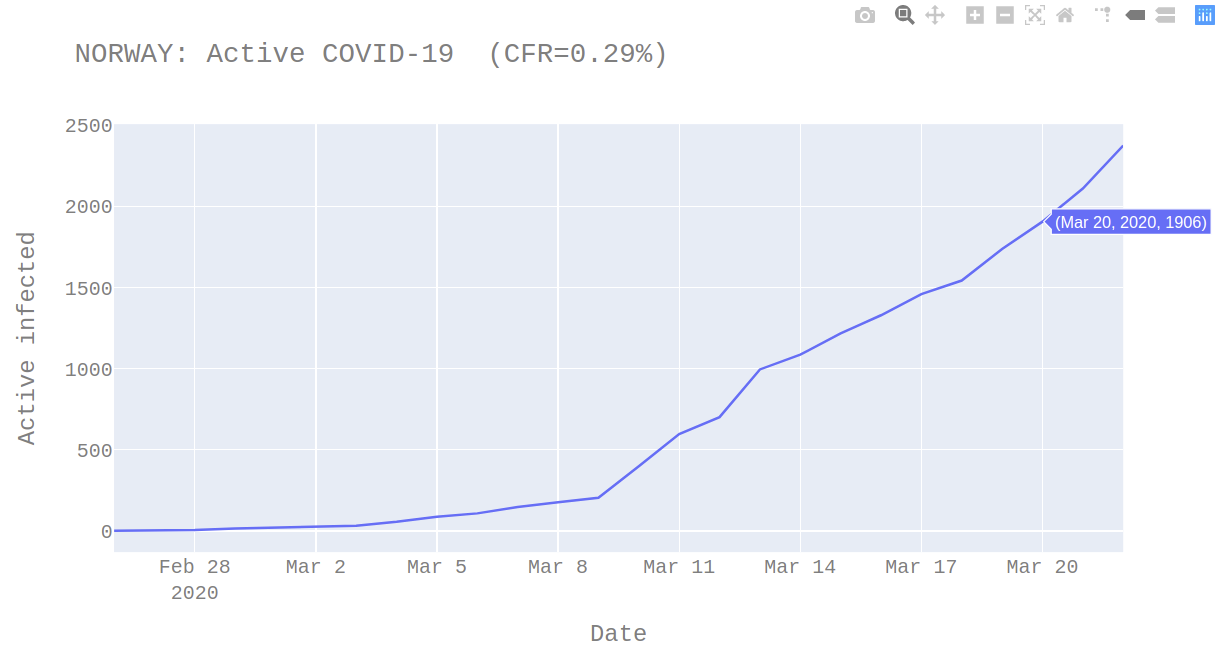

In [30]:
from IPython.display import Image
Image('./assets/active_cases_cfr_norway.png', width=600)

In [31]:
region = 'Norway'

fig = go.Figure()
fig.add_trace(go.Scatter(
                x=df[df['Country/Region'] == region].groupby('date')['date'].first(),
                y=df[df['Country/Region'] == region].groupby('date')['Active'].sum(),
                name="Active cases"))

fig.add_trace(go.Scatter(
                x=df[df['Country/Region'] == region].groupby('date')['date'].first(),
                y=df[df['Country/Region'] == region].groupby('date')['Confirmed'].sum(),
                name="Total Confirmed"))

fig.add_trace(go.Scatter(
                x=df[df['Country/Region'] == region].groupby('date')['date'].first(),
                y=df[df['Country/Region'] == region].groupby('date')['Deaths'].sum(),
                name="Deaths"))

fig.add_trace(go.Scatter(
                x=df[df['Country/Region'] == region].groupby('date')['date'].first(),
                y=df[df['Country/Region'] == region].groupby('date')['Recovered'].sum(),
                name="Recovered"))

fig.update_layout(title="COVID-19 infections in {}".format(region),
                  xaxis_title="Date",
                  yaxis_title="Number of Individuals")

fig.show()

In [32]:
fig = go.Figure()
countries = ['China', 'Italy', 'South Korea', 'US', 'Spain', 'France', 'Germany', 'Norway']

for country in countries:
    fig.add_trace(go.Scatter(
                    x=df[df['Country/Region'] == country].groupby('date')['date'].first(),
                    y=df[df['Country/Region'] == country].groupby('date')['Active'].sum(),
                    name=country,
                    opacity=0.8))

fig.update_layout(title="Active COVID-19 cases",
                  xaxis_title="Date",
                  yaxis_title="Number of Individuals")

fig.show()

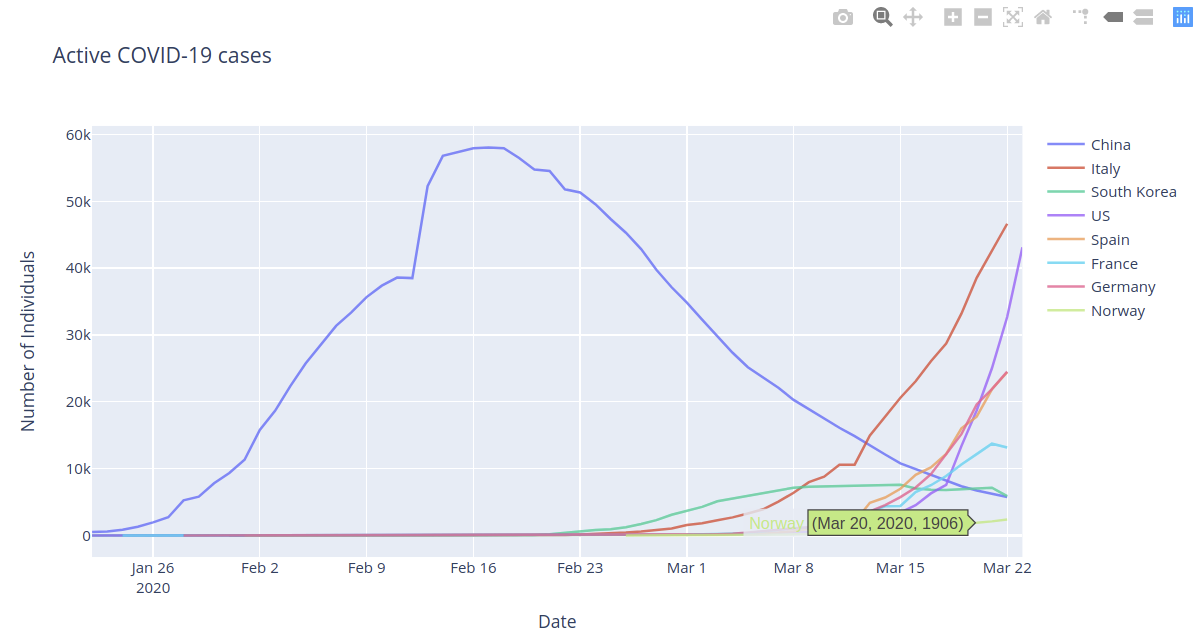

In [33]:
from IPython.display import Image
Image('./assets/active_cases_selected_countries.png', width=600)

In [34]:
fig = go.Figure()
for region in ['China', 'Italy', 'US', 'Spain', 'France', 'Germany', 'South Korea', 'Norway']:
    fig.add_trace(go.Scatter(
                    x=df[df['Country/Region'] == region].groupby('date')['date'].first(),
                    y=df[df['Country/Region'] == region].groupby('date')['Active'].sum(),
                    name=region,
                    hoverinfo='x+y+z+text+name',
                    stackgroup='one'))

fig.update_layout(title="COVID-19 Active Cases Worldwide",
                  xaxis_title="Date",
                  yaxis_title="Number of Individuals")

fig.show()